In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h1><center><b>IoT + AI Use case study: Detecting attacks and anomolies in BoT IoT </b></center></h1>

# Import Libraries

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Import data sets

https://cloudstor.aarnet.edu.au/
|

In [ ]:
# Training Dataset
data_path1 = 'https://cloudstor.aarnet.edu.au/plus/s/umT99TnxvbpkkoE/download?path=%2FCSV%2FTraning%20and%20Testing%20Tets%20(5%25%20of%20the%20entier%20dataset)%2FAll%20features&files=UNSW_2018_IoT_Botnet_Full5pc_1.csv'

data_path2 = 'https://cloudstor.aarnet.edu.au/plus/s/umT99TnxvbpkkoE/download?path=%2FCSV%2FTraning%20and%20Testing%20Tets%20(5%25%20of%20the%20entier%20dataset)%2FAll%20features&files=UNSW_2018_IoT_Botnet_Full5pc_2.csv'

data_path3 = 'https://cloudstor.aarnet.edu.au/plus/s/umT99TnxvbpkkoE/download?path=%2FCSV%2FTraning%20and%20Testing%20Tets%20(5%25%20of%20the%20entier%20dataset)%2FAll%20features&files=UNSW_2018_IoT_Botnet_Full5pc_3.csv'

data_path4 = 'https://cloudstor.aarnet.edu.au/plus/s/umT99TnxvbpkkoE/download?path=%2FCSV%2FTraning%20and%20Testing%20Tets%20(5%25%20of%20the%20entier%20dataset)%2FAll%20features&files=UNSW_2018_IoT_Botnet_Full5pc_4.csv'

data1 = pd.read_csv(data_path1)
data2 = pd.read_csv(data_path2)
data3 = pd.read_csv(data_path3)
data4 = pd.read_csv(data_path4)

data = pd.concat([data1, data2, data3, data4])

data.head()

,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1,1.528089e+09,e,1,tcp,1,192.168.100.147,49960,192.168.100.7,80,...,1.12704,96,75,1.133720,1.129970,770,602,1,DoS,HTTP
1,2,1.528089e+09,e,1,arp,2,192.168.100.7,-1,192.168.100.147,-1,...,15267.20000,1,2,0.005142,0.005142,2,6,1,DoS,HTTP
2,3,1.528089e+09,e,1,tcp,1,192.168.100.147,49962,192.168.100.7,80,...,1.12704,96,75,1.135100,1.129970,770,602,1,DoS,HTTP
3,4,1.528089e+09,e,1,tcp,1,192.168.100.147,49964,192.168.100.7,80,...,1.12704,96,75,1.135140,1.129970,770,602,1,DoS,HTTP
4,5,1.528089e+09,e,1,tcp,1,192.168.100.147,49966,192.168.100.7,80,...,1.12704,96,75,1.135260,1.129970,770,602,1,DoS,HTTP


# Data analysis

In [ ]:
# General Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3668522 entries, 0 to 668521
Data columns (total 46 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   pkSeqID                           int64  
 1   stime                             float64
 2   flgs                              object 
 3   flgs_number                       int64  
 4   proto                             object 
 5   proto_number                      int64  
 6   saddr                             object 
 7   sport                             object 
 8   daddr                             object 
 9   dport                             object 
 10  pkts                              int64  
 11  bytes                             int64  
 12  state                             object 
 13  state_number                      int64  
 14  ltime                             float64
 15  seq                               int64  
 16  dur                               flo

## Exploratory Data Analysis

In [ ]:
data.describe()

,pkSeqID,stime,flgs_number,proto_number,pkts,bytes,state_number,ltime,seq,dur,...,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack
count,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,...,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06
mean,1.834262e+06,1.528050e+09,1.490206e+00,2.095884e+00,7.725963e+00,8.690501e+02,3.134390e+00,1.528050e+09,1.213204e+05,2.033479e+01,...,7.369070e+02,3.327439e+02,2.851832e+02,9.245168e+01,8.253848e+01,4.564945e+02,5.385196e+02,6.422897e+02,5.859984e+02,9.998700e-01
std,1.059011e+06,2.581498e+05,8.652444e-01,9.990837e-01,1.155876e+02,1.122667e+05,1.186971e+00,2.581507e+05,7.579428e+04,2.148764e+01,...,6.527134e+02,8.466031e+03,4.096943e+03,1.817643e+01,2.439739e+01,1.432917e+04,1.569824e+04,4.533432e+02,4.332619e+02,1.140212e-02
min,1.000000e+00,1.526344e+09,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+01,1.000000e+00,1.526344e+09,1.000000e+00,0.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,9.171312e+05,1.528085e+09,1.000000e+00,1.000000e+00,5.000000e+00,4.200000e+02,3.000000e+00,1.528085e+09,5.487600e+04,1.256256e+01,...,5.000000e+02,2.359950e-01,2.436680e-01,1.000000e+02,6.900000e+01,2.314810e-01,2.457730e-01,3.240000e+02,2.940000e+02,1.000000e+00
50%,1.834262e+06,1.528096e+09,1.000000e+00,3.000000e+00,7.000000e+00,6.000000e+02,4.000000e+00,1.528096e+09,1.177690e+05,1.550852e+01,...,7.000000e+02,3.900890e-01,3.986290e-01,1.000000e+02,1.000000e+02,3.785910e-01,3.943060e-01,6.000000e+02,5.000000e+02,1.000000e+00
75%,2.751392e+06,1.528099e+09,2.000000e+00,3.000000e+00,9.000000e+00,7.700000e+02,4.000000e+00,1.528099e+09,1.849300e+05,2.709986e+01,...,9.200000e+02,5.725580e-01,5.796390e-01,1.000000e+02,1.000000e+02,5.725550e-01,5.769710e-01,8.280000e+02,8.000000e+02,1.000000e+00
max,3.668522e+06,1.529381e+09,9.000000e+00,5.000000e+00,7.005700e+04,7.183334e+07,1.100000e+01,1.529382e+09,2.622120e+05,2.771485e+03,...,2.444250e+05,2.714290e+06,1.000000e+06,1.000000e+02,1.000000e+02,3.000000e+06,2.000000e+06,1.125440e+05,1.179390e+05,1.000000e+00


1    3668045
0        477
Name: attack, dtype: int64

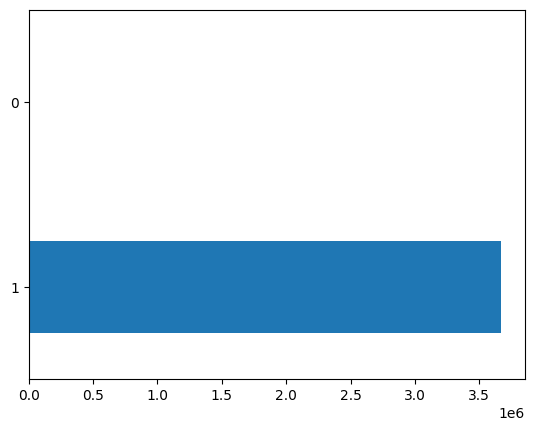

In [ ]:
data["attack"].value_counts().plot(kind='barh')
data["attack"].value_counts()

DDoS              1926624
DoS               1650260
Reconnaissance      91082
Normal                477
Theft                  79
Name: category, dtype: int64

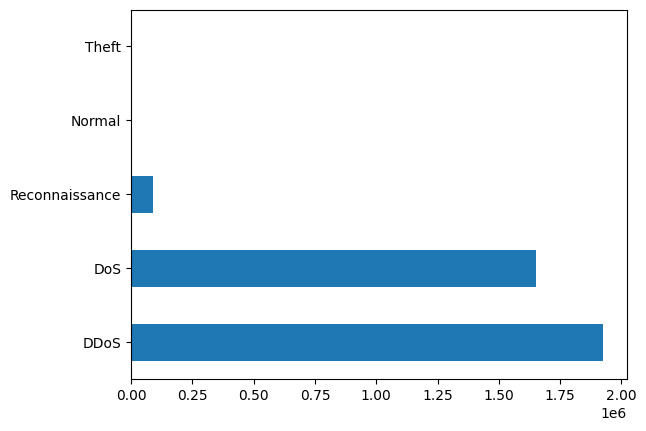

In [ ]:
data["category"].value_counts().plot(kind='barh')
data["category"].value_counts()

UDP                  1981230
TCP                  1593180
Service_Scan           73168
OS_Fingerprint         17914
HTTP                    2474
Normal                   477
Keylogging                73
Data_Exfiltration          6
Name: subcategory, dtype: int64

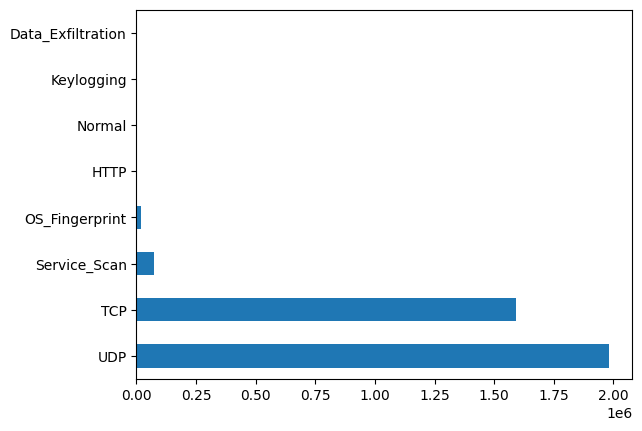

In [ ]:
data["subcategory"].value_counts().plot(kind='barh')
data["subcategory"].value_counts()

# Prepare final sample for project

In [ ]:
data_upd = data[data['subcategory'] == 'UDP']
data_upd = data_upd.iloc[::10, :]

data_tcp = data[data['subcategory'] == 'TCP']
data_tcp = data_tcp.iloc[::10, :]

data_ss = data[data['subcategory'] == 'Service_Scan']


data_osf = data[data['subcategory'] == 'OS_Fingerprint']

data_http = data[data['subcategory'] == 'HTTP']

data_normal = data[data['subcategory'] == 'Normal']

data_Keylogging = data[data['subcategory'] == 'Keylogging']

data_Data_Exfiltration = data[data['subcategory'] == 'Data_Exfiltration']



In [ ]:
data_final = data_upd.append(data_tcp, ignore_index = True)

data_final = data_final.append(data_ss, ignore_index = True)


data_final = data_final.append(data_osf, ignore_index = True)

data_final = data_final.append(data_http, ignore_index = True)

data_final = data_final.append(data_normal, ignore_index = True)


data_final = data_final.append(data_Keylogging, ignore_index = True)

data_final = data_final.append(data_Data_Exfiltration, ignore_index = True)


In [ ]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451553 entries, 0 to 451552
Data columns (total 46 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   pkSeqID                           451553 non-null  int64  
 1   stime                             451553 non-null  float64
 2   flgs                              451553 non-null  object 
 3   flgs_number                       451553 non-null  int64  
 4   proto                             451553 non-null  object 
 5   proto_number                      451553 non-null  int64  
 6   saddr                             451553 non-null  object 
 7   sport                             451553 non-null  object 
 8   daddr                             451553 non-null  object 
 9   dport                             451553 non-null  object 
 10  pkts                              451553 non-null  int64  
 11  bytes                             451553 non-null  i

### Extracting best features

In [ ]:
data = data_final

In [ ]:
features_list = []
features_attributes_lists = []

target_attributes_list = ['attack','category','subcategory']

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

for i in data.columns:
  if i not in target_attributes_list:
    features_list.append(i)

for i in features_list:
    if data[i].dtype in numerics:
        features_attributes_lists.append(i)

features_data_frame = data[features_attributes_lists]
target_features = data[target_attributes_list]

In [ ]:
features_attributes_lists

['pkSeqID',
 'stime',
 'flgs_number',
 'proto_number',
 'pkts',
 'bytes',
 'state_number',
 'ltime',
 'seq',
 'dur',
 'mean',
 'stddev',
 'sum',
 'min',
 'max',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'srate',
 'drate',
 'TnBPSrcIP',
 'TnBPDstIP',
 'TnP_PSrcIP',
 'TnP_PDstIP',
 'TnP_PerProto',
 'TnP_Per_Dport',
 'AR_P_Proto_P_SrcIP',
 'AR_P_Proto_P_DstIP',
 'N_IN_Conn_P_DstIP',
 'N_IN_Conn_P_SrcIP',
 'AR_P_Proto_P_Sport',
 'AR_P_Proto_P_Dport',
 'Pkts_P_State_P_Protocol_P_DestIP',
 'Pkts_P_State_P_Protocol_P_SrcIP']

## Data Preprocessing

In [ ]:
target_features.head()

,attack,category,subcategory
0,1,DoS,UDP
1,1,DoS,UDP
2,1,DoS,UDP
3,1,DoS,UDP
4,1,DoS,UDP


In [ ]:
# Label Encoding the target columns
le = LabelEncoder()
target_features['category'] = le.fit_transform(target_features['category'])
target_features['subcategory'] = le.fit_transform(target_features['subcategory'])

target_features.head()

,attack,category,subcategory
0,1,1,7
1,1,1,7
2,1,1,7
3,1,1,7
4,1,1,7


In [ ]:
# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(features_data_frame,target_features, test_size=0.20, random_state=1, stratify=target_features)


In [ ]:
# Scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-1.50815854,  0.48395059,  0.46423449, ..., -0.09877602,
        -0.09874781, -0.01464567],
       [ 0.20916276,  0.50556773,  0.46423449, ..., -0.09877171,
        -0.09874781, -0.01464567],
       [-0.08005986,  0.5055409 ,  0.46423449, ..., -0.09876804,
         0.16837326,  0.28147734],
       ...,
       [ 1.23803543, -2.11877626, -0.49095119, ...,  0.79499711,
        -0.5034767 , -0.66372338],
       [ 1.27571247, -2.11325091, -0.49095119, ...,  0.14975765,
        -0.50617489, -0.46630804],
       [ 1.23795522, -2.11882349, -0.49095119, ...,  0.79499711,
        -0.5034767 , -0.66372338]])

# Defining the ML Model Classes

In [ ]:
class GradientBoost_attack:
    def __init__(self):
        self.xgb_attack = XGBClassifier()


    def fit(self,X_train,y_train):
        self.xgb_attack.fit(X_train,y_train['attack'])


    def predict(self,X_test):
        predict_attack = self.xgb_attack.predict(X_test)

        return pd.DataFrame({'attack':predict_attack})

    def feature_engineering(self):
        feature_attack = self.xgb_attack.feature_importances_

        return feature_attack

    def score(self, x_test, y_test):

      score_val = self.xgb_attack.score(x_test, y_test)

      return score_val

In [ ]:
class GradientBoost_category:
    def __init__(self):
        self.xgb_category = XGBClassifier()

    def fit(self,X_train,y_train):

        features_category = np.concatenate((X_train,np.array(y_train['attack']).reshape(-1,1)),axis=1)
        self.xgb_category.fit(features_category,y_train['category'])

    def predict(self,X_test, xgb_attack, x_attack_input):
        predict_attack = xgb_attack.predict(x_attack_input)

        test_category = np.concatenate((X_test,predict_attack.to_numpy().reshape(-1,1)),axis=1)
        predict_category = self.xgb_category.predict(test_category)

        return pd.DataFrame({'category':predict_category})

    def feature_engineering(self):

        feature_category = self.xgb_category.feature_importances_

        return feature_category

    def score(self, x_test, y_test):

      score_val = self.xgb_category.score(x_test, y_test)

      return score_val

In [ ]:
class GradientBoost_subcategory:
    def __init__(self):
        self.xgb_subcategory = XGBClassifier()

    def fit(self,X_train,y_train):

        features_category = np.concatenate((X_train,np.array(y_train['attack']).reshape(-1,1)),axis=1)
        features_subcategory = np.concatenate((features_category,np.array(y_train['category']).reshape(-1,1)),axis=1)
        self.xgb_subcategory.fit(features_subcategory,y_train['subcategory'])

    def predict(self,X_test, xgb_attack, xgb_attack_test, xgb_category, xgb_category_test):
        predict_attack = xgb_attack.predict(xgb_attack_test)

        predict_category = xgb_category.predict(xgb_category_test, xgb_attack, xgb_attack_test)

        features_category = np.concatenate((X_test,predict_attack.to_numpy().reshape(-1,1)),axis=1)
        features_subcategory = np.concatenate((features_category,predict_category.to_numpy().reshape(-1,1)),axis=1)
        predict_subcategory = self.xgb_subcategory.predict(features_subcategory)

        return pd.DataFrame({'subcategory':predict_subcategory})

    def feature_engineering(self):
        feature_subcategory = self.xgb_subcategory.feature_importances_

        return feature_subcategory

    def score(self, x_test, y_test):

      score_val = self.xgb_subcategory.score(x_test, y_test)

      return score_val

# Feature Engineering

## Attack

In [ ]:
xgb_attack = GradientBoost_attack()
xgb_attack.fit(X_train,y_train)


[9.1526829e-02 4.9351566e-03 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 5.1925620e-03 3.6358954e-03 2.7719638e-03 1.8260182e-03
 0.0000000e+00 9.6770271e-04 3.7251941e-03 1.1442248e-02 4.0422645e-04
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.3562348e-02
 0.0000000e+00 0.0000000e+00 4.0966645e-03 2.3348561e-02 4.8138457e-03
 6.3555478e-03 7.1011537e-01 1.3146870e-02 0.0000000e+00 7.4023958e-03
 4.9003515e-02 6.4051114e-03 1.0793839e-02 1.0527212e-02 9.2116538e-03
 4.7892858e-03]


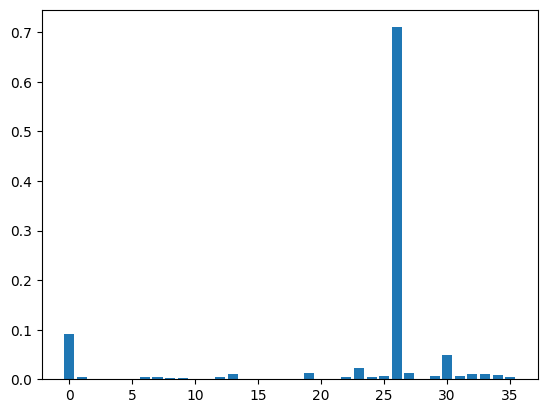

In [ ]:
feature_attack_val = xgb_attack.feature_engineering()
print(feature_attack_val)
# plot
plt.bar(range(len(feature_attack_val)), feature_attack_val)
plt.show()

In [ ]:
final_main_features_attack = []

complete_features = list(features_data_frame.columns)

for i in range(len(feature_attack_val)):
    if feature_attack_val[i]>0:
      final_main_features_attack.append(complete_features[i])



In [ ]:
final_main_features_attack, len(final_main_features_attack)

(['pkSeqID',
  'stime',
  'state_number',
  'ltime',
  'seq',
  'dur',
  'stddev',
  'sum',
  'min',
  'max',
  'rate',
  'TnBPSrcIP',
  'TnBPDstIP',
  'TnP_PSrcIP',
  'TnP_PDstIP',
  'TnP_PerProto',
  'TnP_Per_Dport',
  'AR_P_Proto_P_DstIP',
  'N_IN_Conn_P_DstIP',
  'N_IN_Conn_P_SrcIP',
  'AR_P_Proto_P_Sport',
  'AR_P_Proto_P_Dport',
  'Pkts_P_State_P_Protocol_P_DestIP',
  'Pkts_P_State_P_Protocol_P_SrcIP'],
 24)

## Category

In [ ]:
xgb_category = GradientBoost_category()
xgb_category.fit(X_train,y_train)


[3.4538934e-01 6.4584970e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 1.4347036e-05 5.5822961e-06 0.0000000e+00
 0.0000000e+00 3.6128122e-06 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 6.5448903e-06 1.0846592e-05 1.2646332e-05 0.0000000e+00 0.0000000e+00
 9.1447509e-06 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 8.6982902e-03]


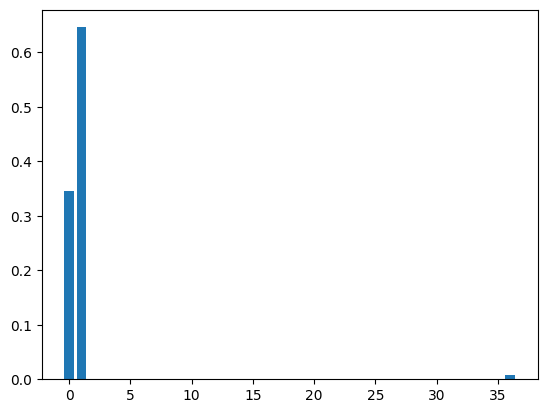

In [ ]:
feature_attack_val = xgb_category.feature_engineering()
print(feature_attack_val)
# plot
plt.bar(range(len(feature_attack_val)), feature_attack_val)
plt.show()

In [ ]:
final_main_features_category = []

complete_features = list(features_data_frame.columns)

for i in range(len(feature_attack_val)):
    if feature_attack_val[i]>0 and i<len(complete_features):

      final_main_features_category.append(complete_features[i])



## Sub-Category

In [ ]:
xgb_subcategory = GradientBoost_subcategory()
xgb_subcategory.fit(X_train,y_train)

[2.9192246e-02 2.6329765e-02 2.9548493e-01 9.9746063e-02 1.7292788e-02
 2.2858316e-02 5.9111651e-02 1.2350090e-04 1.8078383e-02 1.4704464e-03
 2.4539535e-05 1.4651623e-06 3.7100783e-01 0.0000000e+00 1.5651697e-06
 6.8835737e-03 3.5276557e-06 2.0434871e-05 4.0760827e-03 2.8834075e-02
 3.8363794e-07 2.7462514e-07 0.0000000e+00 9.3926228e-06 0.0000000e+00
 0.0000000e+00 1.1735164e-05 3.3321696e-05 0.0000000e+00 0.0000000e+00
 3.7308237e-06 0.0000000e+00 7.8928576e-07 0.0000000e+00 4.1909957e-06
 9.3501120e-07 2.8479674e-03 1.6546167e-02]


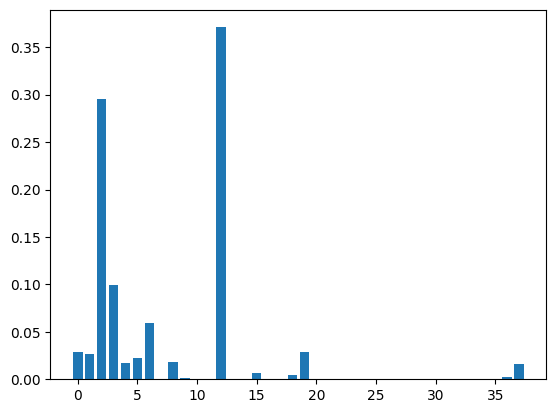

In [ ]:
feature_attack_val = xgb_subcategory.feature_engineering()
print(feature_attack_val)
# plot
plt.bar(range(len(feature_attack_val)), feature_attack_val)
plt.show()

In [ ]:
final_main_features_subcategory = []

complete_features = list(features_data_frame.columns)

for i in range(len(feature_attack_val)):
    if feature_attack_val[i]>0 and i< len(complete_features):
      final_main_features_subcategory.append(complete_features[i])



In [ ]:
final_main_features_subcategory

['pkSeqID',
 'stime',
 'flgs_number',
 'proto_number',
 'pkts',
 'bytes',
 'state_number',
 'ltime',
 'seq',
 'dur',
 'mean',
 'stddev',
 'sum',
 'max',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'srate',
 'drate',
 'TnBPDstIP',
 'TnP_PerProto',
 'TnP_Per_Dport',
 'N_IN_Conn_P_DstIP',
 'AR_P_Proto_P_Sport',
 'Pkts_P_State_P_Protocol_P_DestIP',
 'Pkts_P_State_P_Protocol_P_SrcIP']

# Attack

In [ ]:
features_data_frame__attack = data[final_main_features_attack]

In [ ]:
X_train_attack, X_test_attack, y_train_attack, y_test_attack = train_test_split(features_data_frame__attack,target_features, test_size=0.20, random_state=1, stratify=target_features)

# Scaling the data
sc = StandardScaler()
X_train_attack = sc.fit_transform(X_train_attack)
X_test_attack = sc.transform(X_test_attack)


In [ ]:
len(X_test_attack[0])

24

## Training ML Models

In [ ]:
xgb_attack = GradientBoost_attack()
xgb_attack.fit(X_train_attack,y_train_attack)

## Validation of ML Models on validation Dataset

In [ ]:
predictions_xgb_attack = xgb_attack.predict(X_test_attack)

In [ ]:
print(confusion_matrix(y_test_attack['attack'],predictions_xgb_attack['attack']))
print(classification_report(y_test_attack['attack'],predictions_xgb_attack['attack']))

[[   95     0]
 [    1 90215]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        95
           1       1.00      1.00      1.00     90216

    accuracy                           1.00     90311
   macro avg       0.99      1.00      1.00     90311
weighted avg       1.00      1.00      1.00     90311



In [ ]:
attack_score = xgb_attack.score(X_test_attack,y_test_attack['attack'])
attack_score

0.9999889271517313

# Category


In [ ]:
features_data_frame_categoty = data[final_main_features_category]

In [ ]:
X_train_category, X_test_category, y_train_category, y_test_category = train_test_split(features_data_frame_categoty,target_features, test_size=0.20, random_state=1, stratify=target_features)

# Scaling the data
sc = StandardScaler()
X_train_category = sc.fit_transform(X_train_category)
X_test_category = sc.transform(X_test_category)


In [ ]:
len(X_test_category[0])

9

## Training ML Models

In [ ]:
xgb_category = GradientBoost_category()
xgb_category.fit(X_train_category,y_train_category)

## Validation of ML Models on validation Dataset

In [ ]:
predictions_xgb_category = xgb_category.predict(X_test_category , xgb_attack, X_test_attack)

In [ ]:
print(confusion_matrix(y_test_category['category'],predictions_xgb_category['category']))
print(classification_report(y_test_category['category'],predictions_xgb_category['category']))

[[38711     0     0     0     0]
 [    0 33273     0     0     0]
 [    0     0    95     0     0]
 [    0     0     0 18217     0]
 [    0     0     0     0    15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38711
           1       1.00      1.00      1.00     33273
           2       1.00      1.00      1.00        95
           3       1.00      1.00      1.00     18217
           4       1.00      1.00      1.00        15

    accuracy                           1.00     90311
   macro avg       1.00      1.00      1.00     90311
weighted avg       1.00      1.00      1.00     90311



# Sub-Category

In [ ]:
features_data_frame_subcategory = data[final_main_features_subcategory]

In [ ]:
X_train_subcategory, X_test_subcategory, y_train_subcategory, y_test_subcategory = train_test_split(features_data_frame_subcategory,target_features, test_size=0.20, random_state=1, stratify=target_features)

# Scaling the data
sc = StandardScaler()
X_train_subcategory = sc.fit_transform(X_train_subcategory)
X_test_subcategory = sc.transform(X_test_subcategory)


## Training ML Models

In [ ]:
xgb_subcategory = GradientBoost_subcategory()
xgb_subcategory.fit(X_train_subcategory, y_train_subcategory)

## Validation of ML Models on validation Dataset

In [ ]:
predictions_xgb_subcategory = xgb_subcategory.predict(X_test_subcategory, xgb_attack, X_test_attack, xgb_category, X_test_category)

In [ ]:
print(confusion_matrix(y_test_subcategory['subcategory'],predictions_xgb_subcategory['subcategory']))
print(classification_report(y_test_subcategory['subcategory'],predictions_xgb_subcategory['subcategory']))

[[    1     0     0     0     0     0     0     0]
 [    0   495     0     0     0     0     0     0]
 [    0     0    14     0     0     0     0     0]
 [    0     0     0    95     0     0     0     0]
 [    0     0     0     0  3583     0     0     0]
 [    0     0     0     0     0 14634     0     0]
 [    0     0     0     0     0     0 31864     0]
 [    0     0     0     1     0     0     1 39623]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00       495
           2       1.00      1.00      1.00        14
           3       0.99      1.00      0.99        95
           4       1.00      1.00      1.00      3583
           5       1.00      1.00      1.00     14634
           6       1.00      1.00      1.00     31864
           7       1.00      1.00      1.00     39625

    accuracy                           1.00     90311
   macro avg       1.00      1.00      1.00     9

# Make Future Prediction

In [ ]:
data_upd = data[data['subcategory'] == 'UDP']
data_upd = data_upd.iloc[::5, :]

data_tcp = data[data['subcategory'] == 'TCP']

In [ ]:
test_data = data_tcp.iloc[0:2]

In [ ]:
test_data

,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
198123,1486,1.528081e+09,e s,2,tcp,1,192.168.100.147,2542,192.168.100.7,80,...,0.449399,84,15,0.229268,0.466451,99,99,1,DoS,TCP
198124,1496,1.528081e+09,e s,2,tcp,1,192.168.100.147,2559,192.168.100.7,80,...,0.449399,84,15,0.229269,0.466451,99,99,1,DoS,TCP


In [ ]:
features_data_frame__attack = test_data[final_main_features_attack]

sc = StandardScaler()
X_train_attack = sc.fit_transform(X_train_attack)
X_test_attack = sc.transform(features_data_frame__attack)

predictions_xgb_attack = xgb_attack.predict(X_test_attack)
predictions_xgb_attack

,attack
0,1
1,1


In [ ]:
def make_future_prediction(test_data, X_train_attack, X_train_category, X_train_subcategory,
                           final_main_features_attack, final_main_features_category, final_main_features_subcategory):

  result = []

  # X test attack
  features_data_frame__attack = test_data[final_main_features_attack]

  sc = StandardScaler()
  X_train_attack = sc.fit_transform(X_train_attack)
  X_test_attack = sc.transform(features_data_frame__attack)

  predictions_xgb_attack = xgb_attack.predict(X_test_attack)
  predictions_xgb_attack

  # X test category
  features_data_frame__category = test_data[final_main_features_category]
  X_train_category = sc.fit_transform(X_train_category)
  X_test_category = sc.transform(features_data_frame__category)

  predictions_xgb_category = xgb_category.predict(X_test_category, xgb_attack, X_test_attack)
  predictions_xgb_category

  # X test sub category
  features_data_frame__subcategory = test_data[final_main_features_subcategory]
  X_train_subcategory = sc.fit_transform(X_train_subcategory)
  X_test_subcategory = sc.transform(features_data_frame__subcategory)

  predictions_xgb_subcategory = xgb_subcategory.predict(X_test_subcategory, xgb_attack, X_test_attack, xgb_category, X_test_category)
  predictions_xgb_subcategory

  return pd.concat([predictions_xgb_attack, predictions_xgb_category, predictions_xgb_subcategory], axis=1)


In [ ]:
result = make_future_prediction(test_data, X_train_attack, X_train_category, X_train_subcategory,
                                final_main_features_attack, final_main_features_category, final_main_features_subcategory)

print(result)

   attack  category  subcategory
0       1         4            2
1       1         4            2
